# import

In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel

import geopandas as gpd
from shapely import geometry
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\qchasserieau\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


SQLalchemy is not installed. No support for SQL output.


In [2]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'

# read_file

In [3]:
links = gpd.read_file(input_folder+'gtfs/links.geojson', driver='GeoJSON')
nodes = gpd.read_file(input_folder+'gtfs/nodes.geojson', driver='GeoJSON')
zones = gpd.read_file(input_folder+'zones/zones.geojson', driver='GeoJSON')

In [4]:
zones.index = zones['index']

# set_index with node IDs

In [5]:
nodes

,index,stop_id,geometry
0,1000014,1000014,POINT (-69.88408 18.50382)
1,1000233,1000233,POINT (-69.92906 18.48259)
2,1000020,1000020,POINT (-69.91345 18.47625)
3,1000083,1000083,POINT (-69.93358 18.46391)
4,1000106,1000106,POINT (-69.95266 18.47277)
...,...,...,...
276,1000004,1000004,POINT (-69.91417 18.48186)
277,1000003,1000003,POINT (-69.91205 18.47103)
278,1000001,1000001,POINT (-69.91626 18.45926)
279,1000000,1000000,POINT (-69.92447 18.45534)


In [6]:
nodes.set_index('stop_id', inplace=True)

# cut with convex hull

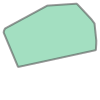

In [7]:
road_nodes = gpd.read_file(input_folder+'road/road_nodes.geojson', driver='GeoJSON')
convex_hull = geometry.MultiPolygon(list(zones['geometry'])).convex_hull.buffer(0.002)
convex_hull

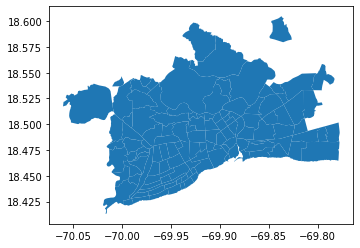

In [8]:
ax = zones.plot()

In [9]:
def cut(gdf, stencil):
    contained = gdf['geometry'].apply(lambda g: stencil.contains(g))
    return gdf.loc[contained]

plt.rcParams['figure.figsize'] = [10, 7]

# initialize_model

In [10]:
sm = stepmodel.StepModel()

In [11]:
sm.links = cut(links, convex_hull)
sm.nodes = cut(nodes, convex_hull)
sm.zones = cut(zones, convex_hull)

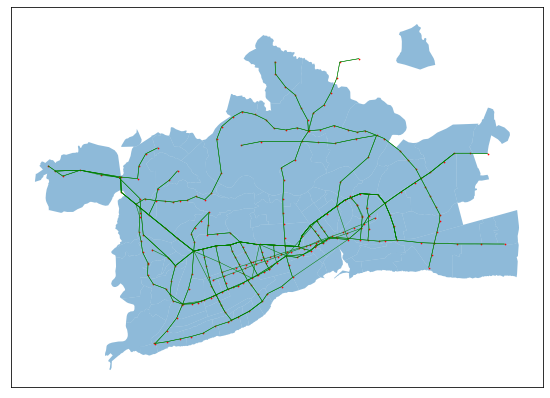

In [12]:
ax = sm.plot('zones', alpha=0.5, figsize=[17, 7])
ax = sm.plot('links', linewidth=0.5, color='green', ax=ax)
plot= sm.plot('nodes', markersize=0.5, color='red', ax=ax)

In [13]:
sm.to_zip(training_folder + r'model/preparation/base.zip')

jsons: 100%|███████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 62.31it/s]


# json

In [14]:
sm.to_json(training_folder + r'model/latest')

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 33.63it/s]

could not save geometry from table fare_rules
could not save geometry from table fare_attributes
could not save geometry from table mode_nests
could not save geometry from table logit_scales
could not save geometry from table utility_values
